In [6]:
from rembg import remove
from PIL import Image, ImageFilter, ImageEnhance
import cv2
import numpy as np
from matplotlib import pyplot as plt

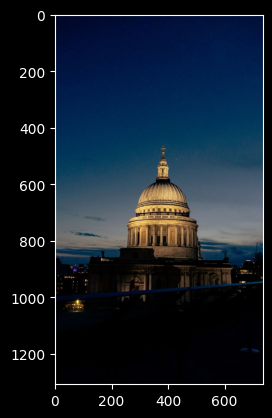

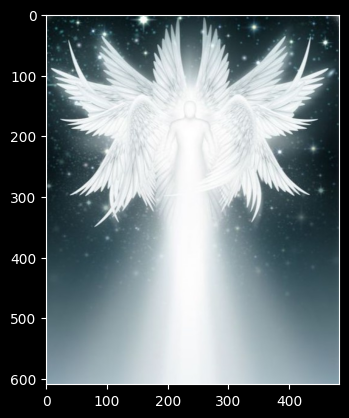

In [161]:
# 读取图像
image_path = "../Pic/Test/St.jpg"
image = cv2.imread(image_path)

# 转换颜色空间
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(image_rgb)
plt.show()

image_path = "../Pic/Test/Angel.jpg"
image = cv2.imread(image_path)

# 转换颜色空间
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(image_rgb)
plt.show()



In [256]:
from PIL import Image

# 打开背景图像和覆盖图像
background = Image.open("../High Resolution Pic/Test/St.jpg")
overlay = Image.open("../High Resolution Pic/Test/Angel.jpg")


overlay = overlay.resize(background.size, Image.LANCZOS)

# 调整覆盖图像的透明度
overlay = overlay.convert("RGBA")
alpha = 40  # 透明度值，0完全透明，255完全不透明
overlay.putalpha(alpha)

# 将覆盖图像粘贴到背景图像上
background = background.convert("RGBA")
combined = Image.alpha_composite(background, overlay)

# 显示并保存结果图像
combined.show()
combined.save("../Processed Pic/Test/result.png")


In [ ]:
background = Image.open("../High Resolution Pic/Test/St.jpg")
overlay = Image.open("../Remove Pic/Test/Angel3.png")


background.paste(overlay,(0,0))

background.show()

In [259]:
from PIL import Image

# 打开图片
background = Image.open("../High Resolution Pic/Test/St.jpg")
foreground = Image.open("../Remove Pic/Test/Angel3.png")

# 调整前景图片大小，例如缩小到原来的50%
new_size = (int(foreground.width * 0.3), int(foreground.height * 0.3))
foreground = foreground.resize(new_size, Image.Resampling.LANCZOS)

# 将前景图片粘贴到背景图片上，假设放在背景图片的中央
position = (
    (background.width - foreground.width) // 2,
    (background.height - foreground.height) // 2
)
background.paste(foreground, (1200,0), foreground)

background.show()


In [262]:

overlay = Image.open("../Pic/Test/yellow light.jpg")


overlay = overlay.resize(background.size, Image.LANCZOS)

# 调整覆盖图像的透明度
overlay = overlay.convert("RGBA")
alpha = 100  # 透明度值，0完全透明，255完全不透明
overlay.putalpha(alpha)

# 将覆盖图像粘贴到背景图像上
background = background.convert("RGBA")
combined = Image.alpha_composite(background, overlay)

# 显示并保存结果图像
combined.show()


Test 1.2

In [19]:
from PIL import Image, ImageSequence

# 打开图片并转换为RGBA模式
background = Image.open("../High Resolution Pic/Test/St.jpg").convert("RGBA")
foreground = Image.open("../Remove Pic/Test/Angel3.png").convert("RGBA")
light = Image.open("../High Resolution Pic/Test/yellow light.jpg").convert("RGBA")

# 调整光效图片大小以匹配背景大小
light = light.resize(background.size, Image.LANCZOS)

# 设置光效图片的透明度
alpha = 170  # 透明度值，0完全透明，255完全不透明
light.putalpha(alpha)

# 调整前景图片大小，例如缩小到原来的30%
new_size = (int(foreground.width * 0.3), int(foreground.height * 0.3))
foreground = foreground.resize(new_size, Image.LANCZOS)

# 移动范围和步长
move_range = 700  # 上下移动的范围
step = 10         # 每次移动的步长

# 初始位置
start_position = (1200, 0)
background_width, background_height = background.size

frames = []

# 动态移动前景图片
for i in range(0, move_range, step):
    # 计算新的垂直位置
    new_position = (start_position[0], start_position[1] + i)
    
    # 创建一个新的光效图片，大小与背景一致
    full_size_light = Image.new("RGBA", background.size)
    
    # 确定裁剪区域的下边界，确保不会超过光效图片的高度
    lower_bound = min(i + background_height, light.height)
    
    # 裁剪光效图片
    crop_light = light.crop((0, i, background_width, lower_bound))
    
    # 将裁剪后的光效图片粘贴到新的光效图片上
    full_size_light.paste(crop_light, (0, 0), crop_light)
    
    # 创建新的背景图片副本
    background_copy = background.copy()
    
    # 将前景图片粘贴到新的位置
    background_copy.paste(foreground, new_position, foreground)
    
    # 合成光效图片和背景图片
    combined = Image.alpha_composite(background_copy, full_size_light)
    
    # 添加到frames
    frames.append(combined)

# 保存为GIF
frames[0].save('animated.gif', save_all=True, append_images=frames[1:], loop=0, duration=100)


In [21]:
from PIL import Image, ImageDraw, ImageSequence, ImageEnhance, ImageFilter
import numpy as np

# 提亮图像
def brighten_image(image, factor=1.5):
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(factor)
    return brightened_image

# 打开图片并转换为RGBA模式
background = Image.open("../High Resolution Pic/Test/St.jpg").convert("RGBA")
foreground = Image.open("../Remove Pic/Test/Angel3.png").convert("RGBA")
light = Image.open("../Pic/Test/yellow light.jpg").convert("RGBA")

# 调整光效图片大小以匹配背景大小
light = light.resize(background.size, Image.LANCZOS)

# 设置光效图片的透明度
alpha = 170  # 透明度值，0完全透明，255完全不透明
light.putalpha(alpha)

# 调整前景图片大小，例如缩小到原来的30%
new_size = (int(foreground.width * 0.3), int(foreground.height * 0.3))
foreground = foreground.resize(new_size, Image.LANCZOS)



# 提亮背景图像
brightened_background = brighten_image(background)
light = brighten_image(light)
foreground = brighten_image(foreground)

# 移动范围和步长
move_range = 700  # 上下移动的范围
step = 10         # 每次移动的步长

# 初始位置
start_position = (1200, 0)
background_width, background_height = brightened_background.size

frames = []

# 动态移动前景图片
for i in range(0, move_range, step):
    # 计算新的垂直位置
    new_position = (start_position[0], start_position[1] + i)
    
    # 创建一个新的光效图片，大小与背景一致
    full_size_light = Image.new("RGBA", brightened_background.size)
    
    # 确定裁剪区域的下边界，确保不会超过光效图片的高度
    lower_bound = min(i-5 + background_height, light.height)
    
    # 裁剪光效图片
    crop_light = light.crop((0, i, background_width, lower_bound))
    
    # 将裁剪后的光效图片粘贴到新的光效图片上
    full_size_light.paste(crop_light, (0, 0), crop_light)
    
    # 创建新的背景图片副本
    background_copy = brightened_background.copy()
    
    # 将前景图片粘贴到新的位置
    background_copy.paste(foreground, new_position, foreground)
    
    # 合成光效图片和背景图片
    combined = Image.alpha_composite(background_copy, full_size_light)
    
    # 添加到frames
    frames.append(combined)

# 保存为GIF
frames[0].save('animated_with_clouds_and_brightened.gif', save_all=True, append_images=frames[1:], loop=0, duration=100)


Test 2

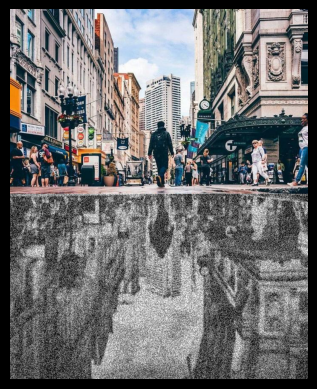

In [53]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    # 转换为灰度图像以创建复古效果
    img = ImageOps.grayscale(img)
    
    # 增加颜色
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    
    # 增加对比度
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    
    # 增加亮度
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    
    # 添加模糊效果以增强复古感觉
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    
    # 添加噪点
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)

    return img

# 加载原始图像
original_img = Image.open('../Pic/Test/street2.jpg')

# 获取图像的尺寸
original_width, original_height = original_img.size

# 裁剪图像的下半部分
lower_half = original_img.crop((0, original_height // 2, original_width, original_height))

# 对下半部分应用复古滤镜
lower_half_vintage = add_vintage_filter(lower_half)

# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_vintage.convert("RGB"), (0, original_height // 2))

# 显示结果
plt.imshow(combined_img)
plt.axis('off')
plt.show()


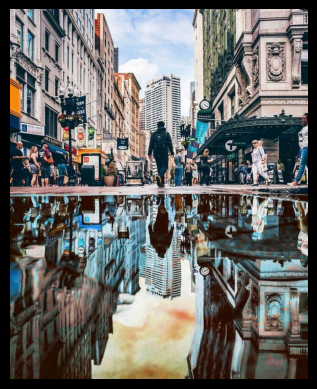

In [54]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    # 转换为灰度图像以创建复古效果
    img = ImageOps.grayscale(img)
    
    # 增加颜色
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    
    # 增加对比度
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    
    # 增加亮度
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    
    # 添加模糊效果以增强复古感觉
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    
    # 添加噪点
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)

    return img

def add_fantasy_filter(img):
    # 转换为OpenCV图像
    img_cv = np.array(img)

    # 转换为HSV颜色空间
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
    
    # 调整色调通道以产生奇幻颜色
    hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
    
    # 转换回RGB颜色空间
    img_fantasy = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # 转换回PIL图像
    img_fantasy = Image.fromarray(img_fantasy)

    return img_fantasy

# 加载原始图像
original_img = Image.open('../Pic/Test/street2.jpg')

# 获取图像的尺寸
original_width, original_height = original_img.size

# 裁剪图像的下半部分
lower_half = original_img.crop((0, original_height // 2, original_width, original_height))

# 对下半部分应用奇幻滤镜
lower_half_fantasy = add_fantasy_filter(lower_half)

# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_fantasy, (0, original_height // 2))

# 显示结果
plt.imshow(combined_img)
plt.axis('off')
plt.show()


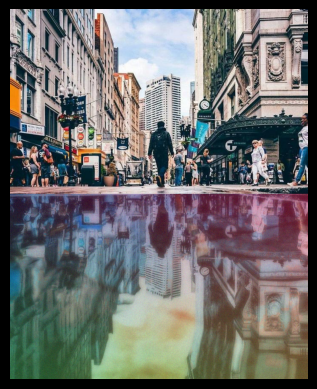

In [55]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    # 转换为灰度图像以创建复古效果
    img = ImageOps.grayscale(img)
    
    # 增加颜色
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    
    # 增加对比度
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    
    # 增加亮度
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    
    # 添加模糊效果以增强复古感觉
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    
    # 添加噪点
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)

    return img

def add_fantasy_filter(img):
    # 转换为OpenCV图像
    img_cv = np.array(img)

    # 转换为HSV颜色空间
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
    
    # 调整色调通道以产生奇幻颜色
    hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
    
    # 转换回RGB颜色空间
    img_fantasy = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # 转换回PIL图像
    img_fantasy = Image.fromarray(img_fantasy)

    return img_fantasy

def add_rainbow_filter(img):
    # 创建彩虹渐变图像
    gradient = np.zeros((img.height, img.width, 3), dtype=np.uint8)
    for i in range(img.height):
        for j in range(img.width):
            gradient[i, j] = [int(255 * j / img.width), int(255 * i / img.height), 128]

    gradient_img = Image.fromarray(gradient)
    img = Image.blend(img, gradient_img, 0.3)
    
    return img

def add_glow_effect(img):
    # 增加发光效果
    img_glow = img.filter(ImageFilter.GaussianBlur(radius=5))
    img = Image.blend(img, img_glow, 0.5)
    
    return img

def add_star_effect(img):
    # 添加星光效果
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    
    return img

# 加载原始图像
original_img = Image.open('../Pic/Test/street2.jpg')

# 获取图像的尺寸
original_width, original_height = original_img.size

# 裁剪图像的下半部分
lower_half = original_img.crop((0, original_height // 2, original_width, original_height))

# 对下半部分应用奇幻滤镜和其他效果
lower_half = add_fantasy_filter(lower_half)
lower_half = add_rainbow_filter(lower_half)
lower_half = add_glow_effect(lower_half)
lower_half = add_star_effect(lower_half)

# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2))
combined_img_new = Image.new('RGB', (original_width, original_height))
combined_img_new.paste(upper_half, (0, 0))
combined_img_new.paste(lower_half, (0, original_height // 2))

# 显示结果
plt.imshow(combined_img_new)
plt.axis('off')
plt.show()


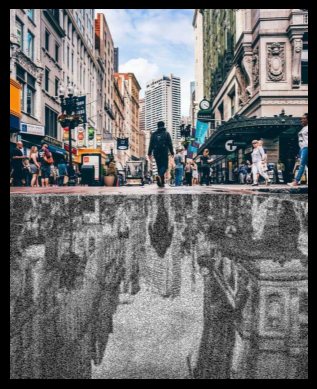

In [127]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    # 转换为灰度图像以创建复古效果
    img = ImageOps.grayscale(img)
    
    # 增加颜色
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    
    # 增加对比度
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    
    # 增加亮度
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    
    # 添加模糊效果以增强复古感觉
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    
    # 添加噪点
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)

    return img

# 加载原始图像
original_img = Image.open('../Pic/Test/street2.jpg')

# 获取图像的尺寸
original_width, original_height = original_img.size

# 裁剪图像的下半部分
lower_half = original_img.crop((0, original_height // 2, original_width, original_height))

# 对下半部分应用复古滤镜
lower_half_vintage = add_vintage_filter(lower_half)

# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_vintage.convert("RGB"), (0, original_height // 2))

# 将最终图像转换为 NumPy 数组
combined_img_np = np.array(combined_img)

# 应用动态模糊效果
size = 3
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

blurred = cv2.filter2D(combined_img_np, -1, kernel_motion_blur)

# 转换回 PIL 图像
blurred_img = Image.fromarray(blurred)

# 显示结果
plt.imshow(blurred_img)
plt.axis('off')
plt.show()


<>:58: SyntaxWarning: invalid escape sequence '\P'
<>:58: SyntaxWarning: invalid escape sequence '\P'
C:\Users\jiayi\AppData\Local\Temp\ipykernel_29164\1978262711.py:58: SyntaxWarning: invalid escape sequence '\P'
  night_background = Image.open('..\Pic\Big ben\star.jpeg')


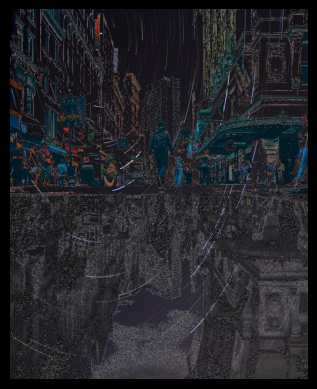

In [85]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    # 转换为灰度图像以创建复古效果
    img = ImageOps.grayscale(img)
    
    # 增加颜色
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    
    # 增加对比度
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    
    # 增加亮度
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    
    # 添加模糊效果以增强复古感觉
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    
    # 添加噪点
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)

    return img

def change_background_to_night(img, background_img):
    # 转换为NumPy数组
    img_np = np.array(img)
    background_np = np.array(background_img.resize(img.size))
    
    # 转换为灰度图像以进行阈值分割
    gray_img = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    
    # 提取前景
    img_fg = cv2.bitwise_and(img_np, img_np, mask=mask_inv)
    
    # 提取背景
    background_bg = cv2.bitwise_and(background_np, background_np, mask=mask)
    
    # 合并前景和背景
    combined = cv2.add(img_fg, background_bg)
    
    # 转换回PIL图像
    combined_img = Image.fromarray(combined)
    
    return combined_img

# 加载原始图像和夜晚背景图像
original_img = Image.open('../Pic/Test/street2.jpg')
night_background = Image.open('..\Pic\Big ben\star.jpeg')

# 获取图像的尺寸
original_width, original_height = original_img.size

# 裁剪图像的下半部分
lower_half = original_img.crop((0, original_height // 2, original_width, original_height))

# 对下半部分应用复古滤镜
lower_half_vintage = add_vintage_filter(lower_half)
# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_vintage.convert("RGB"), (0, original_height // 2))

# 更换背景为夜晚场景
final_img_with_night_background = change_background_to_night(combined_img, night_background)

# 显示结果
plt.imshow(final_img_with_night_background)
plt.axis('off')
plt.show()



TEST 3

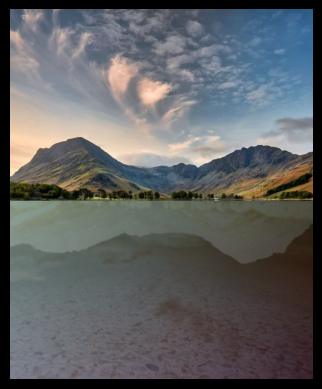

In [128]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    img = ImageOps.grayscale(img)
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)
    return img

def add_fantasy_filter(img):
    img_cv = np.array(img)
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
    img_fantasy = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    img_fantasy = Image.fromarray(img_fantasy)
    return img_fantasy

def add_rainbow_filter(img):
    gradient = np.zeros((img.height, img.width, 3), dtype=np.uint8)
    for i in range(img.height):
        for j in range(img.width):
            gradient[i, j] = [int(255 * j / img.width), int(255 * i / img.height), 128]
    gradient_img = Image.fromarray(gradient)
    img = Image.blend(img, gradient_img, 0.3)
    return img

def add_glow_effect(img):
    img_glow = img.filter(ImageFilter.GaussianBlur(radius=5))
    img = Image.blend(img, img_glow, 0.5)
    return img

def add_star_effect(img):
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    return img

def add_invert_colors(img):
    img = ImageOps.invert(img)
    return img

def add_gradient_overlay(img):
    gradient = np.linspace(0, 255, img.width)
    gradient = np.tile(gradient, (img.height, 1)).astype(np.uint8)
    gradient_img = Image.fromarray(gradient, mode='L')
    gradient_img = gradient_img.convert("RGB")
    img = Image.blend(img, gradient_img, 0.5)
    return img

def add_mirror_effect(img):
    img_mirror = ImageOps.mirror(img)
    return img_mirror

def add_texture_overlay(img, texture_path):
    texture = Image.open(texture_path).resize(img.size)
    img = Image.blend(img, texture, 0.3)
    return img

def add_light_shadow_effect(img):
    shadow = Image.new("RGB", img.size, (0, 0, 0))
    shadow = Image.blend(shadow, img, 0.5)
    img = Image.blend(img, shadow, 0.7)
    return img

# 加载原始图像
original_img = Image.open("../High Resolution Pic/Test/Test1.jpg")

# 获取图像的尺寸
original_width, original_height = original_img.size

# 裁剪图像的下半部分
lower_half = original_img.crop((0, original_height // 2 + 50, original_width, original_height))

# 对下半部分应用奇幻滤镜和其他效果
lower_half_fantasy = add_fantasy_filter(lower_half)
lower_half_fantasy = add_rainbow_filter(lower_half_fantasy)
lower_half_fantasy = add_glow_effect(lower_half_fantasy)
lower_half_fantasy = add_star_effect(lower_half_fantasy)
lower_half_fantasy = add_invert_colors(lower_half_fantasy)
lower_half_fantasy = add_gradient_overlay(lower_half_fantasy)
lower_half_fantasy = add_mirror_effect(lower_half_fantasy)
lower_half_fantasy = add_light_shadow_effect(lower_half_fantasy)

# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2+50))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_fantasy, (0, original_height // 2+50))

# 显示结果
plt.imshow(combined_img)
plt.axis('off')
plt.show()


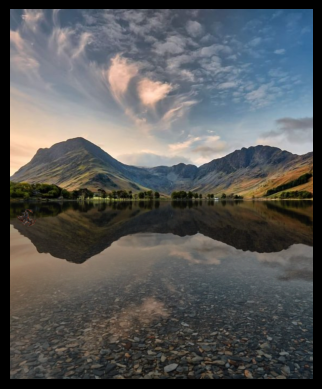

In [119]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fantasy_background(img, background_path):
    # 加载背景图像
    background = Image.open(background_path).resize(img.size)
    # 合并图像和背景
    img = Image.blend(background, img, 0.5)
    return img

def add_3d_object(img, object_path, position):
    # 加载3D物体图像
    object_img = Image.open(object_path).resize((150, 150))  # 调整大小
    object_img = object_img.rotate(180) 
    # 在指定位置添加3D物体
    img.paste(object_img, position, object_img)
    return img

def add_dynamic_elements(img):
    # 添加动态元素（例如：光线、闪烁的星星）
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    return img

def add_ripple_effect(img):
    # 添加涟漪效果
    img_cv = np.array(img)
    rows, cols, _ = img_cv.shape
    img_ripple = np.zeros_like(img_cv)
    for i in range(rows):
        for j in range(cols):
            offset_x = int(20.0 * np.sin(2 * np.pi * i / 150))
            offset_y = int(20.0 * np.cos(2 * np.pi * j / 150))
            if i+offset_x < rows and j+offset_y < cols:
                img_ripple[i, j] = img_cv[(i+offset_x) % rows, (j+offset_y) % cols]
            else:
                img_ripple[i, j] = 0
    img_ripple = Image.fromarray(img_ripple)
    return img_ripple

def add_light_shadow_effect(img):
    shadow = Image.new("RGB", img.size, (0, 0, 0))
    shadow = Image.blend(shadow, img, 0.5)
    img = Image.blend(img, shadow, 0.7)
    return img

# 加载原始图像
original_img = Image.open('../Pic/Test/street2.jpg')

# 获取图像的尺寸
original_width, original_height = original_img.size

# 裁剪图像的下半部分
lower_half = original_img.crop((0, original_height // 2, original_width, original_height))

# 对下半部分应用奇幻效果
lower_half_fantasy = add_3d_object(lower_half, '../Remove Pic/Test/Dragon.png', (50, 50))
lower_half_fantasy = add_dynamic_elements(lower_half_fantasy)
lower_half_fantasy = add_light_shadow_effect(lower_half_fantasy)

# 将原始图像的上半部分和奇幻处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_fantasy, (0, original_height // 2))

# 显示结果
plt.imshow(combined_img)
plt.axis('off')
plt.show()


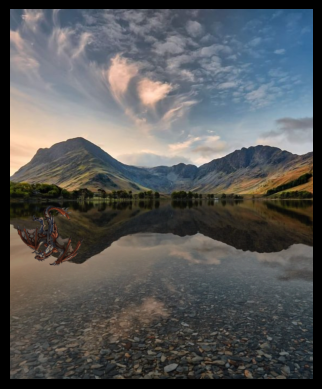

In [103]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fantasy_background(img, background_path):
    # 加载背景图像
    background = Image.open(background_path).resize(img.size)
    # 合并图像和背景
    img = Image.blend(background, img, 0.5)
    return img

def add_3d_object(img, object_path, position):
    # 加载3D物体图像
    object_img = Image.open(object_path).resize((500, 500))  # 调整大小
    object_img = object_img.rotate(180) 
    # 在指定位置添加3D物体
    img.paste(object_img, position, object_img)
    return img

def add_dynamic_elements(img):
    # 添加动态元素（例如：光线、闪烁的星星）
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    return img

def add_ripple_effect(img):
    # 添加涟漪效果
    img_cv = np.array(img)
    rows, cols, _ = img_cv.shape
    img_ripple = np.zeros_like(img_cv)
    for i in range(rows):
        for j in range(cols):
            offset_x = int(20.0 * np.sin(2 * np.pi * i / 150))
            offset_y = int(20.0 * np.cos(2 * np.pi * j / 150))
            if i+offset_x < rows and j+offset_y < cols:
                img_ripple[i, j] = img_cv[(i+offset_x) % rows, (j+offset_y) % cols]
            else:
                img_ripple[i, j] = 0
    img_ripple = Image.fromarray(img_ripple)
    return img_ripple

def add_light_shadow_effect(img):
    shadow = Image.new("RGB", img.size, (0, 0, 0))
    shadow = Image.blend(shadow, img, 0.5)
    img = Image.blend(img, shadow, 0.7)
    return img

# 加载原始图像
original_img = Image.open("../High Resolution Pic/Test/Test1.jpg")

# 获取图像的尺寸
original_width, original_height = original_img.size

# 裁剪图像的下半部分
lower_half = original_img.crop((0, original_height // 2, original_width, original_height))

# 对下半部分应用奇幻效果
lower_half_fantasy = add_3d_object(lower_half, '../Remove Pic/Test/Dragon.png', (50, 50))
lower_half_fantasy = add_dynamic_elements(lower_half_fantasy)
lower_half_fantasy = add_light_shadow_effect(lower_half_fantasy)

# 将原始图像的上半部分和奇幻处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_fantasy, (0, original_height // 2))

# 显示结果
plt.imshow(combined_img)
plt.axis('off')
plt.show()


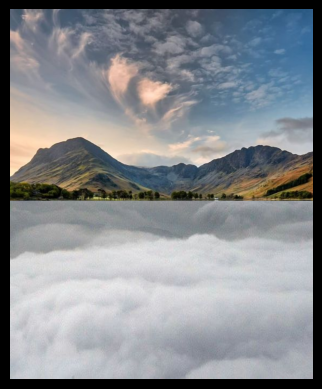

In [264]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    img = ImageOps.grayscale(img)
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)
    return img

def add_fantasy_filter(img):
    img_cv = np.array(img)
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
    img_fantasy = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    img_fantasy = Image.fromarray(img_fantasy)
    return img_fantasy

def add_rainbow_filter(img):
    gradient = np.zeros((img.height, img.width, 3), dtype=np.uint8)
    for i in range(img.height):
        for j in range(img.width):
            gradient[i, j] = [int(255 * j / img.width), int(255 * i / img.height), 128]
    gradient_img = Image.fromarray(gradient)
    img = Image.blend(img, gradient_img, 0.3)
    return img

def add_glow_effect(img):
    img_glow = img.filter(ImageFilter.GaussianBlur(radius=5))
    img = Image.blend(img, img_glow, 0.5)
    return img

def add_star_effect(img):
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    return img

def add_invert_colors(img):
    img = ImageOps.invert(img)
    return img

def add_gradient_overlay(img):
    gradient = np.linspace(0, 255, img.width)
    gradient = np.tile(gradient, (img.height, 1)).astype(np.uint8)
    gradient_img = Image.fromarray(gradient, mode='L')
    gradient_img = gradient_img.convert("RGB")
    img = Image.blend(img, gradient_img, 0.5)
    return img

def add_mirror_effect(img):
    img_mirror = ImageOps.mirror(img)
    return img_mirror

def add_texture_overlay(img, texture_path):
    texture = Image.open(texture_path).resize(img.size)
    img = Image.blend(img, texture, 0.3)
    return img

def add_light_shadow_effect(img):
    shadow = Image.new("RGB", img.size, (0, 0, 0))
    shadow = Image.blend(shadow, img, 0.5)
    img = Image.blend(img, shadow, 0.7)
    return img

# 加载原始图像
original_img = Image.open("../High Resolution Pic/Test/Test1.jpg")
cloud = Image.open("../Pic/Test/cloud.jpg")

# 获取图像的尺寸
original_width, original_height = original_img.size
cloud = cloud.resize(original_img.size, Image.LANCZOS)
cloud = cloud.convert("RGBA")
alpha = 0  # 透明度值，0完全透明，255完全不透明
cloud.putalpha(alpha)

# 调整裁剪位置，向下移动50像素
move_down_pixels = 50
lower_half = original_img.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))
lower_half_cloud = cloud.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))

# 对下半部分应用奇幻滤镜和其他效果
lower_half_fantasy = add_fantasy_filter(lower_half_cloud)
lower_half_fantasy = add_rainbow_filter(lower_half_fantasy)


# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2 + move_down_pixels))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_cloud, (0, original_height // 2 + move_down_pixels))

# 显示结果
plt.imshow(combined_img)
plt.axis('off')
plt.show()


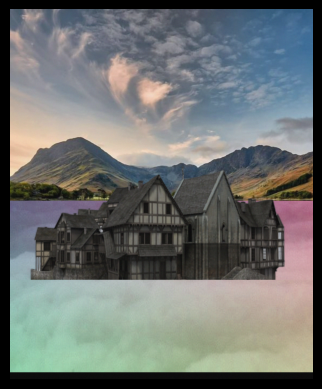

In [179]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    img = ImageOps.grayscale(img)
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)
    return img

def add_fantasy_filter(img):
    img_cv = np.array(img)
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
    img_fantasy = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    img_fantasy = Image.fromarray(img_fantasy)
    return img_fantasy

def add_rainbow_filter(img):
    gradient = np.zeros((img.height, img.width, 3), dtype=np.uint8)
    for i in range(img.height):
        for j in range(img.width):
            gradient[i, j] = [int(255 * j / img.width), int(255 * i / img.height), 128]
    gradient_img = Image.fromarray(gradient)
    img = Image.blend(img, gradient_img, 0.3)
    return img

def add_glow_effect(img):
    img_glow = img.filter(ImageFilter.GaussianBlur(radius=5))
    img = Image.blend(img, img_glow, 0.5)
    return img

def add_star_effect(img):
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    return img

def add_invert_colors(img):
    img = ImageOps.invert(img)
    return img

def add_gradient_overlay(img):
    gradient = np.linspace(0, 255, img.width)
    gradient = np.tile(gradient, (img.height, 1)).astype(np.uint8)
    gradient_img = Image.fromarray(gradient, mode='L')
    gradient_img = gradient_img.convert("RGB")
    img = Image.blend(img, gradient_img, 0.5)
    return img

def add_mirror_effect(img):
    img_mirror = ImageOps.mirror(img)
    return img_mirror

def add_texture_overlay(img, texture_path):
    texture = Image.open(texture_path).resize(img.size)
    img = Image.blend(img, texture, 0.3)
    return img

def add_light_shadow_effect(img):
    shadow = Image.new("RGB", img.size, (0, 0, 0))
    shadow = Image.blend(shadow, img, 0.5)
    img = Image.blend(img, shadow, 0.7)
    return img

def add_dynamic_elements(img):
    # 添加动态元素（例如：光线、闪烁的星星）
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    return img


# 加载原始图像
original_img = Image.open("../High Resolution Pic/Test/Test1.jpg")
cloud = Image.open("../Pic/Test/cloud.jpg")
village = Image.open("../Remove Pic/Test/village.png")

# 获取图像的尺寸
original_width, original_height = original_img.size
cloud = cloud.resize(original_img.size, Image.LANCZOS)

village = village.resize((2000,1500))

# 调整裁剪位置，向下移动50像素
move_down_pixels = 50
lower_half = original_img.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))
lower_half_cloud = cloud.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))

# 对下半部分应用奇幻滤镜和其他效果
lower_half_fantasy = add_fantasy_filter(lower_half_cloud)
lower_half_fantasy = add_rainbow_filter(lower_half_fantasy)
lower_half_fantasy_half = lower_half_fantasy.crop((0, original_height // 4 - move_down_pixels, original_width, original_height))


# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2 + move_down_pixels))
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_fantasy, (0, original_height // 2 + move_down_pixels))
combined_img.paste(village,(100,1000),village)
combined_img.paste(lower_half_fantasy_half, (0, original_height // 2 + original_height // 4 - move_down_pixels))
combined_img = add_dynamic_elements(combined_img)


# 显示结果
plt.imshow(combined_img)
plt.axis('off')
plt.show()


1.0


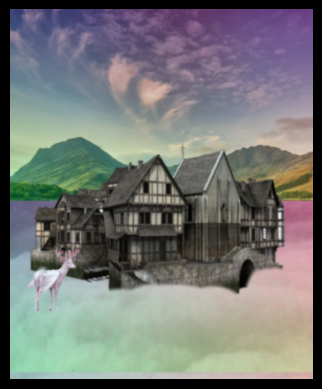

In [276]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_vintage_filter(img):
    img = ImageOps.grayscale(img)
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)
    return img

def add_fantasy_filter(img):
    img_cv = np.array(img)
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
    img_fantasy = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    img_fantasy = Image.fromarray(img_fantasy)
    return img_fantasy

def add_rainbow_filter(img):
    gradient = np.zeros((img.height, img.width, 3), dtype=np.uint8)
    for i in range(img.height):
        for j in range(img.width):
            gradient[i, j] = [int(255 * j / img.width), int(255 * i / img.height), 128]
    gradient_img = Image.fromarray(gradient)
    img = Image.blend(img, gradient_img, 0.3)
    return img

def add_glow_effect(img):
    img_glow = img.filter(ImageFilter.GaussianBlur(radius=5))
    img = Image.blend(img, img_glow, 0.5)
    return img

def add_star_effect(img):
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    return img

def add_invert_colors(img):
    img = ImageOps.invert(img)
    return img

def add_gradient_overlay(img):
    gradient = np.linspace(0, 255, img.width)
    gradient = np.tile(gradient, (img.height, 1)).astype(np.uint8)
    gradient_img = Image.fromarray(gradient, mode='L')
    gradient_img = gradient_img.convert("RGB")
    img = Image.blend(img, gradient_img, 0.5)
    return img

def add_mirror_effect(img):
    img_mirror = ImageOps.mirror(img)
    return img_mirror

def add_texture_overlay(img, texture_path):
    texture = Image.open(texture_path).resize(img.size)
    img = Image.blend(img, texture, 0.3)
    return img

def add_light_shadow_effect(img):
    shadow = Image.new("RGB", img.size, (0, 0, 0))
    shadow = Image.blend(shadow, img, 0.5)
    img = Image.blend(img, shadow, 0.7)
    return img

def add_dynamic_elements(img):
    # 添加动态元素（例如：光线、闪烁的星星）
    star = np.random.randint(0, 255, (img.height, img.width, 3), dtype=np.uint8)
    star_img = Image.fromarray(star)
    img = Image.blend(img, star_img, 0.1)
    return img

def generate_cloud_mask(size):
    cloud_mask = Image.new('L', size, 0)
    draw = ImageDraw.Draw(cloud_mask)
    for _ in range(100):  # 可以调整这个数字来生成更多或更少的云
        x1 = np.random.randint(0, size[0] // 2)
        y1 = np.random.randint(0, size[1] // 2)
        x2 = np.random.randint(size[0] // 2, size[0])
        y2 = np.random.randint(size[1] // 2, size[1])
        draw.ellipse([x1, y1, x2, y2], fill=255)
    cloud_mask = cloud_mask.filter(ImageFilter.GaussianBlur(radius=10))
    return cloud_mask

def brighten_image(image, factor=1.5):
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(factor)
    return brightened_image





# 加载原始图像
original_img = Image.open("../High Resolution Pic/Test/Test1.jpg")
cloud = Image.open("../Pic/Test/cloud.jpg")
village = Image.open("../Remove Pic/Test/village.png")
goat = Image.open("../Remove Pic/Test/goat.png")

# 获取图像的尺寸
original_width, original_height = original_img.size
cloud = cloud.resize(original_img.size, Image.LANCZOS)

goat_width,goat_height = goat.size
print(goat_width/goat_height)
goat = goat.resize((goat_width,goat_height))
village = village.resize((2000,1500))
village = brighten_image(village)

# 调整裁剪位置，向下移动50像素
move_down_pixels = 50
lower_half = original_img.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))
lower_half_cloud = cloud.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))

# 对下半部分应用奇幻滤镜和其他效果
lower_half_fantasy = add_fantasy_filter(lower_half_cloud)
lower_half_fantasy = add_rainbow_filter(lower_half_fantasy)
lower_half_fantasy_half = lower_half_fantasy.crop((0, original_height // 4 - move_down_pixels, original_width, original_height))
lower_half_fantasy_left = lower_half_fantasy.crop((0, original_height // 4 - move_down_pixels-100, original_width//4, original_height))
lower_half_fantasy_left = lower_half_fantasy.crop((0, original_height // 4 - move_down_pixels-100, original_width//4, original_height))
lower_half_fantasy_right = lower_half_fantasy.crop((original_width//2+original_width//4, original_height // 4 - move_down_pixels-100, original_width, original_height))
lower_half_fantasy_bottom = lower_half_fantasy.crop((0, original_height // 6 - move_down_pixels, original_width, original_height))
cloud_mask = generate_cloud_mask(lower_half_fantasy_half.size)
cloud_mask_left = generate_cloud_mask(lower_half_fantasy_left.size)
cloud_mask_left_2 = generate_cloud_mask(lower_half_fantasy_left.size)
cloud_mask_right = generate_cloud_mask(lower_half_fantasy_right.size)



# 将原始图像的上半部分和复古处理后的下半部分合并
upper_half = original_img.crop((0, 0, original_width, original_height // 2 + move_down_pixels))
upper_half = add_rainbow_filter(upper_half)
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_fantasy, (0, original_height // 2 + move_down_pixels))
combined_img.paste(village,(100,850),village)
combined_img.paste(lower_half_fantasy_half, (0, original_height // 2 + original_height // 4 - move_down_pixels),cloud_mask)
combined_img.paste(lower_half_fantasy_left, (0, original_height // 2 + original_height // 4 - move_down_pixels - 100),cloud_mask_left)
combined_img.paste(lower_half_fantasy_right, (original_width//2+original_width//4, original_height // 2 + original_height // 4 - move_down_pixels - 100),cloud_mask_right)
combined_img.paste(lower_half_fantasy_half, (0, original_height  - move_down_pixels))
combined_img.paste(goat,(100,1750),goat)
combined_img= combined_img.filter(ImageFilter.GaussianBlur(radius=4))




# 显示结果
plt.imshow(combined_img)
plt.axis('off')
plt.show()


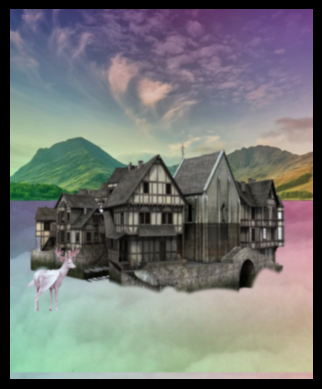

In [279]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps, ImageDraw
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fantasy_filter(img):
    img_cv = np.array(img)
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
    img_fantasy = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    img_fantasy = Image.fromarray(img_fantasy)
    return img_fantasy

def add_rainbow_filter(img):
    gradient = np.zeros((img.height, img.width, 3), dtype=np.uint8)
    for i in range(img.height):
        for j in range(img.width):
            gradient[i, j] = [int(255 * j / img.width), int(255 * i / img.height), 128]
    gradient_img = Image.fromarray(gradient)
    img = Image.blend(img, gradient_img, 0.3)
    return img

def generate_cloud_mask(size):
    cloud_mask = Image.new('L', size, 0)
    draw = ImageDraw.Draw(cloud_mask)
    for _ in range(100):
        x1 = np.random.randint(0, size[0] // 2)
        y1 = np.random.randint(0, size[1] // 2)
        x2 = np.random.randint(size[0] // 2, size[0])
        y2 = np.random.randint(size[1] // 2, size[1])
        draw.ellipse([x1, y1, x2, y2], fill=255)
    cloud_mask = cloud_mask.filter(ImageFilter.GaussianBlur(radius=10))
    return cloud_mask

def brighten_image(image, factor=1.5):
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(factor)
    return brightened_image

# Load the original image
original_img = Image.open("../High Resolution Pic/Test/Test1.jpg")
cloud = Image.open("../Pic/Test/cloud.jpg")
village = Image.open("../Remove Pic/Test/village.png")
goat = Image.open("../Remove Pic/Test/goat.png")

# Get image dimensions
original_width, original_height = original_img.size
cloud = cloud.resize(original_img.size, Image.LANCZOS)

# Resize images
goat_width, goat_height = goat.size
goat = goat.resize((goat_width, goat_height))
village = village.resize((2000, 1500))
village = brighten_image(village)

# Adjust crop position, move down 50 pixels
move_down_pixels = 50
lower_half = original_img.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))
lower_half_cloud = cloud.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))

# Apply fantasy filter and other effects to the lower half
lower_half_fantasy = add_fantasy_filter(lower_half_cloud)
lower_half_fantasy = add_rainbow_filter(lower_half_fantasy)
lower_half_fantasy_half = lower_half_fantasy.crop((0, original_height // 4 - move_down_pixels, original_width, original_height))
lower_half_fantasy_left = lower_half_fantasy.crop((0, original_height // 4 - move_down_pixels - 100, original_width // 4, original_height))
lower_half_fantasy_right = lower_half_fantasy.crop((original_width // 2 + original_width // 4, original_height // 4 - move_down_pixels - 100, original_width, original_height))

cloud_mask = generate_cloud_mask(lower_half_fantasy_half.size)
cloud_mask_left = generate_cloud_mask(lower_half_fantasy_left.size)
cloud_mask_right = generate_cloud_mask(lower_half_fantasy_right.size)

# Combine the original image's upper half and the processed lower half
upper_half = original_img.crop((0, 0, original_width, original_height // 2 + move_down_pixels))
upper_half = add_rainbow_filter(upper_half)
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_fantasy, (0, original_height // 2 + move_down_pixels))
combined_img.paste(village, (100, 850), village)
combined_img.paste(lower_half_fantasy_half, (0, original_height // 2 + original_height // 4 - move_down_pixels), cloud_mask)
combined_img.paste(lower_half_fantasy_left, (0, original_height // 2 + original_height // 4 - move_down_pixels - 100), cloud_mask_left)
combined_img.paste(lower_half_fantasy_right, (original_width // 2 + original_width // 4, original_height // 2 + original_height // 4 - move_down_pixels - 100), cloud_mask_right)
combined_img.paste(lower_half_fantasy_half, (0, original_height - move_down_pixels))
combined_img.paste(goat, (100, 1750), goat)
combined_img = combined_img.filter(ImageFilter.GaussianBlur(radius=4))


combined_img.save("../Processed Pic/Test/Lake result.jpg")
# Display the result
plt.imshow(combined_img)
plt.axis('off')
plt.show()
